# Домашняя работа №2
Панов А.А, Шестаков А.В. Майнор по анализу данных 2016

<hr\>
**Общая информация**

**Срок сдачи:** 19 марта 2016, 23:59 <br\>
**Штраф за опоздание:** -0.5 за каждый день

При отправлении ДЗ на почту указывайте фамилию в названии файла, а тему письма оформляйте в следующем виде:<br\>
** [minor-da-16] *{Фамилия}* *{Имя}* ДЗ*{Номер}* **<br\>


Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

## 1. Теория веротяностей. Распределения

В SciPy более 80 видов непрерывных и более 12 дискретных распределений, более 70 статистических функций

In [1]:
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mps

import scipy.stats

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
%matplotlib inline

**Задача 1.** Сгенерируйте три распределения: гауссовское с мат. ожиданием 1 и дисперсией 4, хи-квадрат с $k = 3$ и дискретное пуассоновское с $\lambda = 10$.<br/> 

При генерации используйте 500 точек. Посчитайте для каждого из них обчный набор статистик: среднее, минимум, максимум, дисперсию, кривизну и смещенность.

In [2]:
n = np.random.normal(loc=1, scale=2, size=500)
ch = np.random.chisquare(3, size=500)
p = np.random.poisson(lam=10, size=500)

def task1(a):
    print('Среднее: ',  np.mean(a))
    print('Минимум: ', min(a))
    print('Максимум: ', max(a))
    print('Дисперсия: ', np.var(a))
    print('Кривизна: ', sp.stats.skew(a))
    print('Смещённость: ', sp.stats.kurtosis(a))
    print('\n')

print('Гауссовское распределение с мат. ожиданием 1 и дисперсией 4')
task1(n)

Гауссовское распределение с мат. ожиданием 1 и дисперсией 4
Среднее:  0.947823243024
Минимум:  -5.7136964935
Максимум:  7.0292522861
Дисперсия:  4.3563533304
Кривизна:  -0.18749242752550646
Смещённость:  0.10331878256770421




In [3]:
print('Распределение хи-квадрат с k=3')
task1(ch)

Распределение хи-квадрат с k=3
Среднее:  3.12184664461
Минимум:  0.013207299316
Максимум:  15.7481191196
Дисперсия:  6.01617223078
Кривизна:  1.4031787376872191
Смещённость:  2.4172890866660257




In [4]:
print('Дискретное пуассоновское распределение с λ=10')
task1(p)

Дискретное пуассоновское распределение с λ=10
Среднее:  9.926
Минимум:  3
Максимум:  22
Дисперсия:  11.188524
Кривизна:  0.4632828815933117
Смещённость:  -0.005549662549007461




**Задача 2.** Найрисуйте функцию (cdf) и плотность (pdf) распределений. На графиках pdf отметьте среднее значение и медиану.



На графиках зеленой линией обозначена функция плотности, синей - функция распределения.
Среднее значение и медиана обозначены черной и красной линией соответсвенно


Гауссовское распределение с мат. ожиданием 1 и дисперсией 4


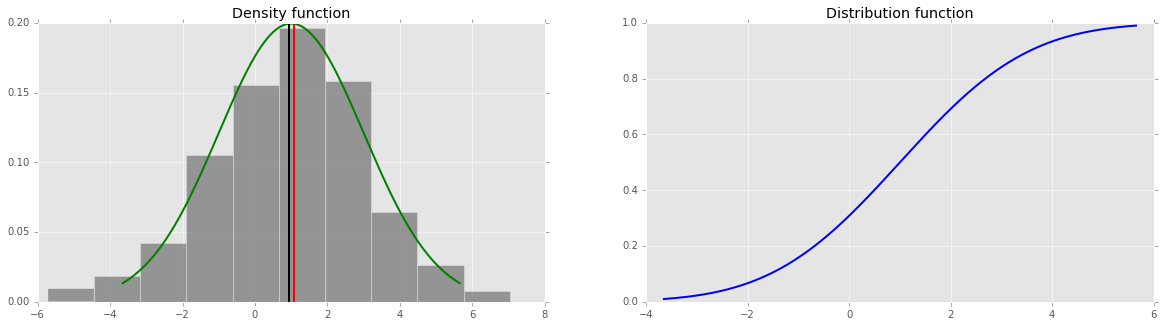

In [5]:
x1 = np.linspace(sp.stats.norm.ppf(0.01, 1, 2), sp.stats.norm.ppf(0.99, 1, 2), 500)
x2 = np.linspace(sp.stats.chi2.ppf(0.01, 3), sp.stats.chi2.ppf(0.99, 3), 500)
x3 = np.arange(sp.stats.poisson.ppf(0.01, 10), sp.stats.poisson.ppf(0.99, 10))

y1 = sp.stats.norm.pdf(x1, 1, 2)
y2 = sp.stats.chi2.pdf(x2, 3)
y3 = sp.stats.poisson.pmf(x3, 10)

z1 = sp.stats.norm.cdf(x1, 1, 2)
z2 = sp.stats.chi2.cdf(x2, 3)
z3 = sp.stats.poisson.cdf(x3, 10)

def task2(a, x, y, z):
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(20,5)
    ax[0].hist(a, normed=True, alpha=0.8, color = 'grey')
    ax[0].plot(x, y, lw=2, color = 'green')
    ax[0].axvline(np.median(a), lw=2, color = 'red')
    ax[0].axvline(np.mean(a), lw=2, color = 'black')
    ax[0].set_title('Density function')
    ax[1].plot(x, z, lw=2, color = 'blue')
    ax[1].set_title('Distribution function')
    

#Создадим отдельную функцию для пуассоновского, поскольку оно не является непрерывным
def task2p(a, x, y, z):
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(20,5)
    ax[0].hist(a, normed=True, alpha=0.8, color = 'grey')
    ax[0].plot(x, y, 'go', ms=6)
    ax[0].axvline(np.median(a), lw=2, color = 'red')
    ax[0].axvline(np.mean(a), lw=2, color = 'black')
    ax[0].set_title('Density function')
    ax[1].plot(x, z, 'bo', ms=6)
    ax[1].set_title('Distribution function')


print('\n')
print('На графиках зеленой линией обозначена функция плотности, синей - функция распределения.')
print('Среднее значение и медиана обозначены черной и красной линией соответсвенно')
print('\n')
print('Гауссовское распределение с мат. ожиданием 1 и дисперсией 4')
task2(n, x1, y1, z1)



Распределение хи-квадрат с k=3


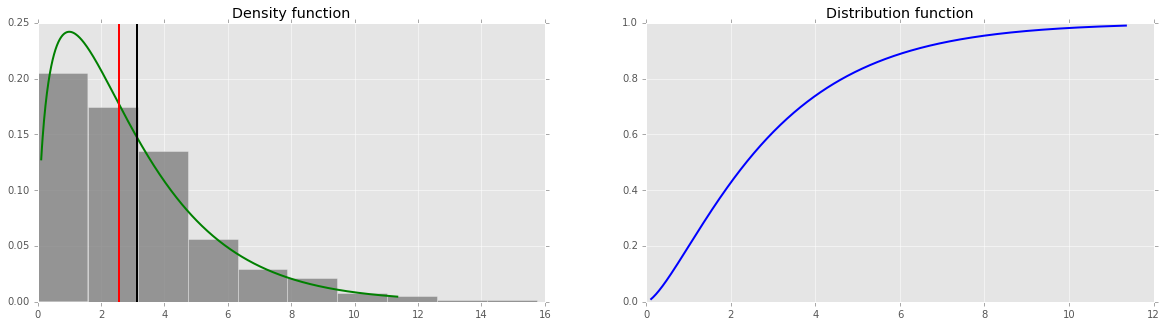

In [6]:
print('\n')
print('Распределение хи-квадрат с k=3')
task2(ch, x2, y2, z2)



Дискретное пуассоновское распределение с λ=10


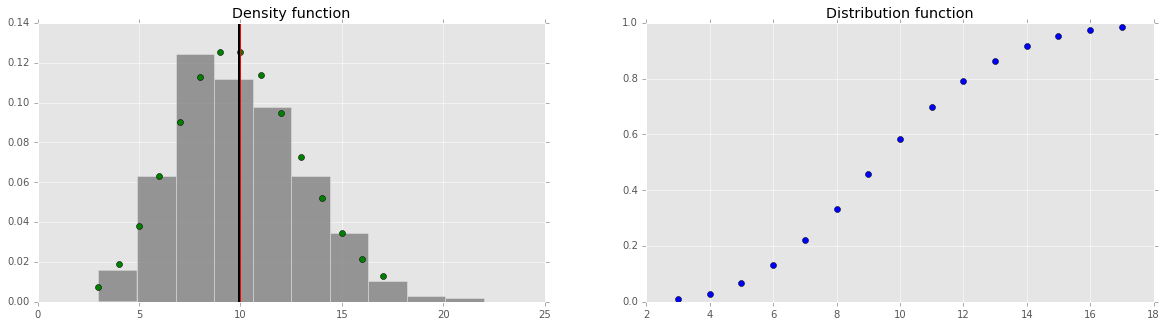

In [7]:
print('\n')
print('Дискретное пуассоновское распределение с λ=10')
task2p(p, x3, y3, z3)

**Задача 3.** Выведите описательные статистики распределений с помощью `scipy.stats.describe`. 

In [8]:
print('Гауссовское распределение с мат. ожиданием 1 и дисперсией 4')
sp.stats.describe(n)

Гауссовское распределение с мат. ожиданием 1 и дисперсией 4


DescribeResult(nobs=500, minmax=(-5.7136964934979, 7.0292522861026301), mean=0.94782324302352539, variance=4.3650834973925301, skewness=-0.18749242752550646, kurtosis=0.10331878256770421)

In [9]:
print('Распределение хи-квадрат с k=3')
sp.stats.describe(ch)

Распределение хи-квадрат с k=3


DescribeResult(nobs=500, minmax=(0.013207299316037282, 15.748119119587244), mean=3.1218466446139796, variance=6.0282286881556661, skewness=1.4031787376872191, kurtosis=2.4172890866660257)

In [10]:
print('Дискретное пуассоновское распределение с λ=10')
sp.stats.describe(p)

Дискретное пуассоновское распределение с λ=10


DescribeResult(nobs=500, minmax=(3, 22), mean=9.9260000000000002, variance=11.210945891783568, skewness=0.4632828815933117, kurtosis=-0.005549662549007461)

## 2. Теория вероятностей. Корреляция и метод максимального правдоподобия

Корреляции с помощью ивестных вам пакетов можно посчитать несколькими способами: pandas.DataFrame.corr и numpy.correlate, numpy.corrcoef и scipy.stats.pearsonr для корреляционного коэффициента Пирсона, scipy.stats.spearmanr для корреляционного коэффициента Спирмена.

Объясните [разницу](http://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/) между коэффициентами корреляции Спирмена и Пирсона.

**Объяснение.** Метод вычисления коэффициента корреляции зависит от вида шкалы, к которой относятся переменные. Так, для измерения переменных с интервальной и количественной шкалами необходимо использовать коэффициент корреляции Пирсона (корреляция моментов произведений). Если по меньшей мере одна из двух переменных имеет порядковую шкалу, либо не является нормально распределённой, необходимо использовать ранговую корреляцию Спирмена. <br/> $P.S.$ автор статьи в [википедии](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D1%8F) сформулировал это лучше, чем я могла бы, но я поняла, что это значит (честно-честно).

В данных из файла [beauty.csv](https://www.dropbox.com/s/xio77e9p0oe1wqw/beauty.csv?dl=0) для каждого опрошенного имеется следующая информация: заработная плата за час работы, опыт работы, образование, внешняя привлекательность (в баллах от 1 до 5), бинарные признаки: пол, семейное положение, состояние здоровья (хорошее/плохое), членство в профсоюзе, цвет кожи (белый/чёрный), занятость в сфере обслуживания (да/нет).

In [11]:
df = pd.read_csv('beauty.csv', sep=';')
df[:2]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3


**Задание 1.** Найдите 3 пары признаков с наибольшей корреляцией. Поясните на конктретных примерах, что означают полученные коэффициенты корреляции.

In [12]:
c = df.corr(method='pearson')
np.fill_diagonal(c.values, 0)
print('Корреляционная матрица (показывает значение коэффициента корреляции двух признаков на пересечении их столбца и строки)')
c

Корреляционная матрица (показывает значение коэффициента корреляции двух признаков на пересечении их столбца и строки)


,wage,exper,union,goodhlth,black,female,married,service,educ,looks
wage,0.000000,0.234632,0.094529,0.006756,-0.059052,-0.313419,0.184521,-0.053653,0.212333,0.055019
exper,0.234632,0.000000,0.089792,-0.131609,0.007566,-0.247209,0.255607,-0.057328,-0.186200,-0.155035
union,0.094529,0.089792,0.000000,-0.022398,0.031939,-0.100037,0.053629,-0.103633,-0.096022,-0.043495
goodhlth,0.006756,-0.131609,-0.022398,0.000000,-0.034073,-0.039684,-0.013315,0.049947,0.107129,0.058558
black,-0.059052,0.007566,0.031939,-0.034073,0.000000,0.113703,-0.133306,0.017261,-0.138157,0.012098
female,-0.313419,-0.247209,-0.100037,-0.039684,0.113703,0.000000,-0.319228,0.267961,0.009105,0.017129
married,0.184521,0.255607,0.053629,-0.013315,-0.133306,-0.319228,0.000000,-0.075082,-0.047674,-0.064636
service,-0.053653,-0.057328,-0.103633,0.049947,0.017261,0.267961,-0.075082,0.000000,0.301628,0.010213
educ,0.212333,-0.186200,-0.096022,0.107129,-0.138157,0.009105,-0.047674,0.301628,0.000000,0.153842
looks,0.055019,-0.155035,-0.043495,0.058558,0.012098,0.017129,-0.064636,0.010213,0.153842,0.000000


In [13]:
table = pd.DataFrame(c.abs().max().sort_values(0, ascending=False).drop_duplicates())
table.reset_index(inplace=True)
table[:3]
#Таблица с максимальными значениями коэффициентов (по модулю)

,index,0
0,married,0.319228
1,wage,0.313419
2,educ,0.301628


In [14]:
def task21(a):
    column = table['index'][a]
    value = table[0][a]
    true_false_table = c.abs().isin([value])
    idx = true_false_table[true_false_table[column] == True].index.tolist()
    row = idx[0]
    print('Признак', column, 'коррелирует с признаком', row)
    print('Коэффициент корреляции равен', c[column][row].round(3))

print('Три пары признаков с наибольшей корреляцией:')
print('\n')
    
for i in range(0,3):
    task21(i)
    print('\n')

Три пары признаков с наибольшей корреляцией:


Признак married коррелирует с признаком female
Коэффициент корреляции равен -0.319


Признак wage коррелирует с признаком female
Коэффициент корреляции равен -0.313


Признак educ коррелирует с признаком service
Коэффициент корреляции равен 0.302




**Пояснение.** <br/> 1. Если респондент ответил, что он состоит в браке, то вероятность того, что респондент женского пола меньше вероятности того, что это мужчина (Такое возможно, например, в случае если в опросе приняло участие много женатых мужчин и много незамужних женщин). <br/> 2. Чем выше зарплата, тем меньше вероятность того, что респондент был женского пола. <br/> 3. Чем выше образование, полученное респондентом, тем больше вероятность того, что он занят в сфере обслуживания. <hr/>

**Задание 2.** На семинаре мы рассмотрели различные распределения случайных величин (дискретные и непрерывные). 

Изобразите гистограммы каждого из признаков.<br/>
Определите возможный закон распределения каждого из них и оцените его параметры. Если готовой функции в scipy.stats для распределения нет, то оцените эти параметры сами по методу максимального правдоподобия.

**Решение.** Изобразим гистограммы каждого из признаков.

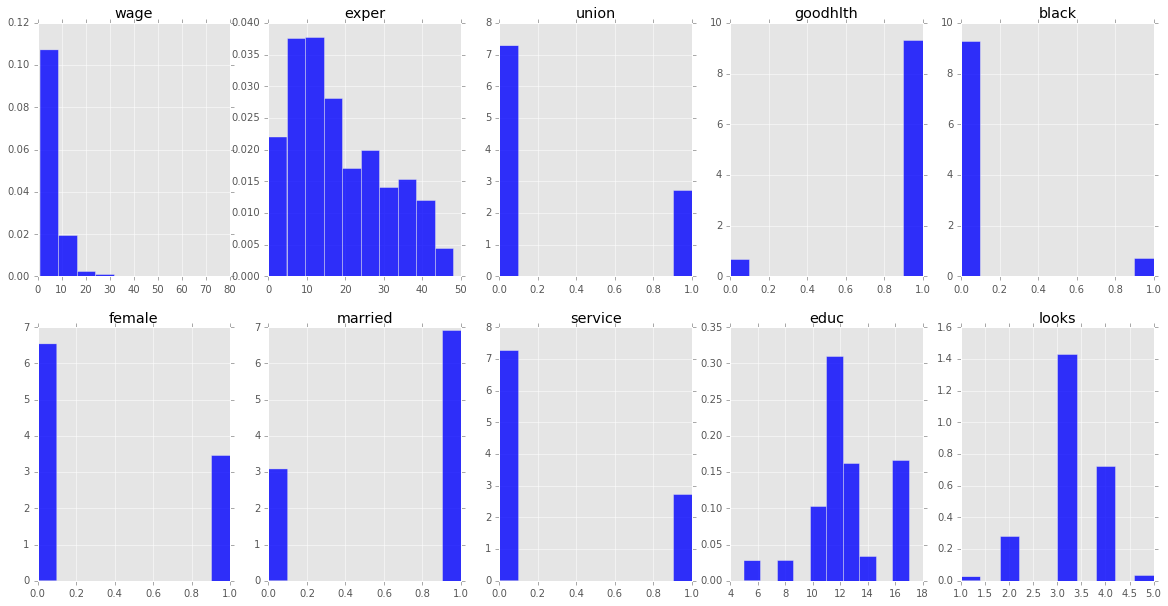

In [15]:
fig, ax = plt.subplots(2,5)
fig.set_size_inches(20,10)
list = ['wage', 'exper', 'union', 'goodhlth', 'black', 'female', 'married', 'service', 'educ', 'looks']

(i, j) = (0, 0)
for x in range(0, 10):
    ax[i,j].hist(df[list[x]], normed=True, color='blue', alpha=0.8)
    ax[i,j].set_title(list[x])
    j += 1
    if j == 5:
        (i, j) = (1, 0)

Заметим, что распределение признака wage напоминает экспоненциальное, распределения признаков looks, educ - многомерное нормальное, а exper - распределение хи-квадрат. <br/> Остальные распределения заданы бинарными признаками, из-за чего их дальнейший анализ не имеет смысла.



На графиках зеленой линией обозначена функция плотности.
Среднее значение и медиана обозначены черной и красной линией соответсвенно


Wage: экспоненциальное распределение с парметром λ = 6.307


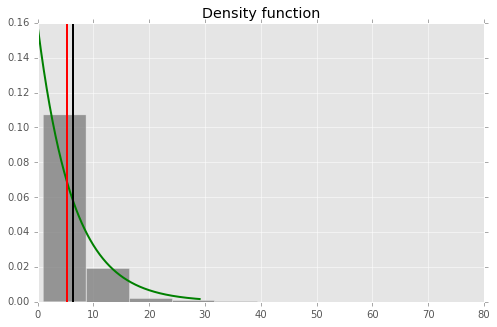

In [16]:
def task2(a, x, y):
    fig, ax = plt.subplots()
    fig.set_size_inches(8,5)
    ax.hist(a, normed=True, alpha=0.8, color = 'grey')
    ax.plot(x, y, lw=2, color = 'green')
    ax.axvline(np.median(a), lw=2, color = 'red')
    ax.axvline(np.mean(a), lw=2, color = 'black')
    ax.set_title('Density function')
    
print('\n')
print('На графиках зеленой линией обозначена функция плотности.')
print('Среднее значение и медиана обозначены черной и красной линией соответсвенно')
print('\n')

r1 = df['wage']
p1 = sp.stats.expon.fit(df['wage'], floc=0)
x1 = np.linspace(sp.stats.expon.ppf(0.01, p1[0], p1[1]), sp.stats.expon.ppf(0.99, p1[0], p1[1]), 500)
y1 = sp.stats.expon.pdf(x1, p1[0], p1[1])
task2(r1, x1, y1)
print('Wage: экспоненциальное распределение с парметром λ =', p1[1].round(3))

Exper: распределение хи-квадрат с параметром k =  4.154


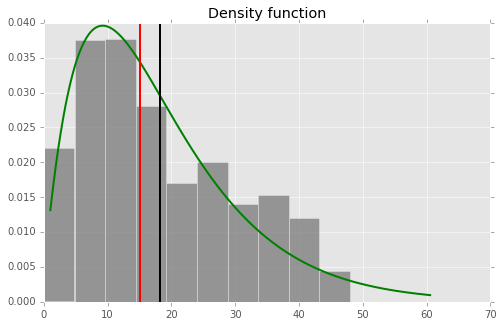

In [17]:
r2 = df['exper']
p2 = sp.stats.chi2.fit(df['exper'])
x2 = np.linspace(sp.stats.chi2.ppf(0.01, p2[0], p2[1], p2[2]), sp.stats.chi2.ppf(0.99, p2[0], p2[1], p2[2]), 500)
y2 = sp.stats.chi2.pdf(x2, p2[0], p2[1], p2[2])
task2(r2, x2, y2)
print('Exper: распределение хи-квадрат с параметром k = ', p2[0].round(3))

Educ: многомерное нормальное распределение с мат.ожиданием =  12.563 и стандартным отклонением =  2.623


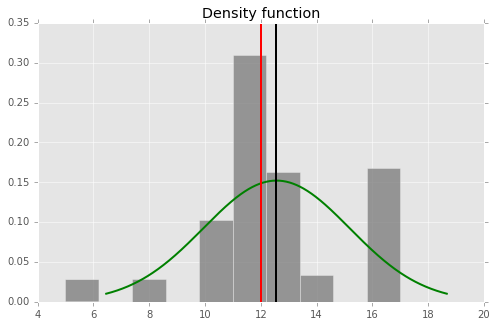

In [18]:
r3 = df['educ']
p3 = sp.stats.norm.fit(df['educ'])
x3 = np.linspace(sp.stats.norm.ppf(0.01, p3[0], p3[1]), sp.stats.norm.ppf(0.99, p3[0], p3[1]), 500)
y3 = sp.stats.norm.pdf(x3, p3[0], p3[1])
task2(r3, x3, y3)
print('Educ: многомерное нормальное распределение с мат.ожиданием = ', p3[0].round(3),
      'и стандартным отклонением = ', p3[1].round(3))

Educ: многомерное нормальное распределение с мат.ожиданием =  3.186 и стандартным отклонением =  0.685


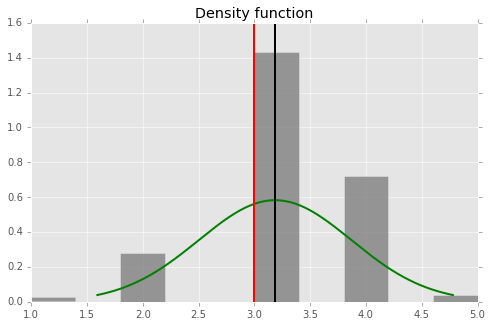

In [19]:
r4 = df['looks']
p4 = sp.stats.norm.fit(df['looks'])
x4 = np.linspace(sp.stats.norm.ppf(0.01, p4[0], p4[1]), sp.stats.norm.ppf(0.99, p4[0], p4[1]), 500)
y4 = sp.stats.norm.pdf(x4, p4[0], p4[1])
task2(r4, x4, y4)
print('Educ: многомерное нормальное распределение с мат.ожиданием = ', p4[0].round(3),
      'и стандартным отклонением = ', p4[1].round(3))

## 3. Метод наивного Байеса

Пояснения по выполнению этого задания будут рассказаны на семинаре 1 марта

Обучение методом наивного Байеса основывается на достаточно сильном предположении, что все признаки попарно независимы. По формуле Байеса $$P(y|x_1,\dots,x_n)=\frac{P(y)P(x_1,\dots,x_n|y)}{P(x_1,\dots,x_n)}.$$ В предположении, что признаки независимы получаем, что $$P(y|x_1,\dots,x_n)=\frac{P(y)\prod_{i=1}^n P(x_i|y)}{P(x_1,\dots,x_n)}$$
Т.к. $$P(x_1,\dots,x_n)$$ задается условиями задачи, принцип максимального правдоподобия для наивного Байеса запишется следующим образом: $$\hat y = \arg\max_y P(y)\prod_{i=1}^n P(x_i|y).$$


Библиотека `sklearn` поддерживает несколько реализаций наивного Байеса: `sklearn.naive_bayes.GaussianNB`, `sklearn.naive_bayes.MultinomialNB` и др.

In [20]:
from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

**При выполнении данного задания я использовала [документации scikit-learn](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html). Честно, будет очень классно, если в следующих домашках будет достаточно ссылок на подобные источники, чтоб не приходилось искать самостоятельно.**

**Задание 1.** Выберите 2 категории новостных сообщений из `20newsgroups`. Случайным образом, в пропорции 70/30, разделите наборы текстов на обучающую и контрольную выборки. В результате выполнения данного задания у вас должно получится 5 переменных: `text_all`, `text_train`, `text_test`, `y_train`, `y_test`.

In [ ]:
# Список новостных заголовков
['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [21]:
groups = fetch_20newsgroups(subset='all', categories=['rec.sport.hockey', 'talk.politics.guns'])
text_all = groups.data
text_train, text_test, y_train, y_test = train_test_split(groups.data, groups.target, test_size = 0.3)

Пример письма, его цель и код цели:

In [22]:
print('\n')
print('\n'.join(text_train[1].split('\n')[:15]))
print('\n')
print('target:', y_train[4])
print('target name:', groups.target_names[y_train[4]])



From: meyers@leonardo.rtp.dg.com (Bill Meyers)
Subject: Re: H.R. 711
Distribution: usa
Organization: N/I
Lines: 17

In article <C5qEpL.1nu@cbnews.cb.att.com> lvc@cbnews.cb.att.com (Larry Cipriani) writes:
[Posting the text of H.R. 711 ...]
[ ... ]
>To amend title 18, United States Code, to ensure that handguns are available
>only to persons with demonstrated knowledge and skill in their safe use,
>maintenance, and storage.
[ ... ]
>8         "(1)(1)(A) An individual who is not licensed under
>9   this section may not possess a handgun on or after the


target: 0
target name: rec.sport.hockey


**Задание 2.** На переменной `text` постройте конвертер из текстов в частотную матрицу с помощью метода `CountVectorizer(analyzer='word', stop_words='english', lowercase=True)`, а затем используйте его на выборках `train` и `test`. В результате вы должны получить 2 матрицы: `X_train` и `X_test`.

In [23]:
cv = CountVectorizer(analyzer='word', stop_words='english', lowercase=True)
cv.fit(text_all)
X_train = cv.transform(text_train).toarray()
X_test = cv.transform(text_test).toarray()
print('X_train')
print(X_train)
print('\n')
print('X_test')
print(X_test)

X_train
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


X_test
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


**Задание 3.** По матрице `X_train` найдите 50 самых частотных слов. Соответствия столбцов и слов можно понять по методу `CountVectorizer.get_feature_names()`.

In [24]:
most_popular = pd.DataFrame({'Частота вхождения':np.sum(X_train, axis=0),
                             'Слово':cv.get_feature_names()}).sort_values(by='Частота вхождения', ascending=False)
most_popular.reset_index(inplace=True)
del most_popular['index']
most_popular[:50]

,Слово,Частота вхождения
0,edu,2722
1,com,1457
2,subject,1411
3,lines,1377
4,organization,1346
5,writes,1063
6,article,961
7,gun,916
8,people,888
9,don,884


**Задание 4.** Обучите наивный байесовский классификатор MultinomialNB с параметром слгаживания `alpha=1` на выборке train. Примените его к данным из тестовой выборке и оцените точность совпадения меток.

In [25]:
clf = MultinomialNB(alpha=1.0).fit(X_train, y_train)
preds = clf.predict(X_test)
probs = clf.predict_proba(X_test)
print('The predictive accuracy = ', np.mean(preds == y_test).round(3))
print('\n')
print('Predicted probabilities')
print(probs)
print('\n')
print(metrics.classification_report(y_test, preds, target_names=groups.target_names))

The predictive accuracy =  0.995


Predicted probabilities
[[  1.00000000e+000   7.32245649e-106]
 [  1.00000000e+000   5.81795352e-047]
 [  3.96928561e-014   1.00000000e+000]
 ..., 
 [  1.82444110e-062   1.00000000e+000]
 [  2.69545321e-045   1.00000000e+000]
 [  1.35762107e-033   1.00000000e+000]]


                    precision    recall  f1-score   support

  rec.sport.hockey       1.00      0.99      0.99       301
talk.politics.guns       0.99      1.00      0.99       272

       avg / total       0.99      0.99      0.99       573



**Задание 5.** Обучите наивный байесовский классификатор MultinomialNB с параметром слгаживания `alpha=0` на выборке train. Примените его к данным из тестовой выборки и оцените точность совпадения меток. Поменяются ли результаты? Объясните почему?

Учитывайте не только метки, но и вероятности, которые выдает классификатор

In [26]:
clf2 = MultinomialNB(alpha=0.0).fit(X_train, y_train)
preds2 = clf2.predict(X_test)
probs2 = clf2.predict_proba(X_test)
print('The predictive accuracy = ', np.mean(preds2 == y_test).round(3))
print('\n')
print('Predicted probabilities')
print(probs2)
print('\n')
print(metrics.classification_report(y_test, preds2, target_names=groups.target_names))

The predictive accuracy =  0.525


Predicted probabilities
[[ nan  nan]
 [ nan  nan]
 [ nan  nan]
 ..., 
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]]


                    precision    recall  f1-score   support

  rec.sport.hockey       0.53      1.00      0.69       301
talk.politics.guns       0.00      0.00      0.00       272

       avg / total       0.28      0.53      0.36       573



**Вывод.** <br/> Да, результаты изменились. Проблема заключается в том, что не оценивается вероятность вхождения тех слов, что не встречались в данных. <br/> В данной модели количество вхождений слова, равное нулю, предполагает соответсвующую нулевую вероятность. Отметим, что одной из предпосылок алгоритма является независимость признаков, которая в свою очередь подразумевает перемножение вероятностей, что в результате даёт ноль. Таким образом, конечная вероятность того, что текст относится к какой-либо категории, равна нулю, чего не может быть априори.